SUPERVISED LEARNING

Supervised learning is used whenever we want to predict a certain outcome from a given input, and we have examples of input/output pairs. We build a machine learning model from these input/output pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data. Supervised learning often requires human effort to build the training set, but afterward automates and often speeds up an otherwise laborious or infeasible task.


1ST TYPE OF SUPERVISED LEARNING = CLASSIFICATION

There are two major types of supervised machine learning problems, called classifica‐ tion and regression.
In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities. Classification is sometimes separated into binary classification, which is the special case of distinguishing between exactly two classes, and multiclass classification, which is classification between more than two classes.

2ND TYPE OF SUPERVISED LEARNING = REGRESSION

For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms (or real number in mathematical terms). Predicting a person’s annual income from their education, their age, and where they live is an example of a regression task. When predicting income, the predicted value is an amount, and can be any number in a given range. Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm. The yield again can be an arbitrary number.

Classification methods
1. K-Nearest Neighbors
2. Logistic Regression and Support Vector Classifier
3. One-vs.-Rest Linear Model
4. Naive Bayes Classifier

Regression methods
1. Linear (OLS) Regression
2. Ridge Regression
3. Lasso

Methods for both Classification and Regression
1. Decision Trees
2. Random Forrests

WHAT PACKAGES DO WE NEED FOR SUPERVISED LEARNING

1. scikit-learn - most prominent Python library for machine learning.
2. numpy - in scikit-learn, the NumPy array is the fundamental data structure. scikit-learn takes in data in the form of NumPy arrays. Any data you’re using will have to be con‐ verted to a NumPy array. 
3. matplotlib - the primary scientific plotting library in Python. It provides functions for making publication-quality visualizations such as line charts, histograms, scatter plots2. 
4. pandas (this can be replaces by polars for more efficient processing) - pandas is a Python library for data wrangling and analysis. It is built around a data structure called the DataFrame that is modeled after the R DataFrame. Simply put, a pandas DataFrame is a table, similar to an Excel spreadsheet. pandas provides a great range of methods to modify and operate on this table; in particular, it allows SQL-like queries and joins of tables. In contrast to NumPy, which requires that all entries in an array be of the same type, pandas allows each column to have a separate type (for example, integers, dates, floating-point numbers, and strings).
5. SciPy - SciPy is a collection of functions for scientific computing in Python. It provides, among other functionality, advanced linear algebra routines, mathematical function optimization, signal processing, special mathematical functions, and statistical distri‐ butions. scikit-learn draws from SciPy’s collection of functions for implementing its algorithms. The most important part of SciPy for us is scipy.sparse: this provides sparse matrices, which are another representation that is used for data in scikit- learn. 
6. mglearn - This is a library of utility functions written for the book Introduction to Machine Learning with Python - A Guide for Data Scientists

In [ ]:
import sys
print(sys.path)
%pip install pandas numpy scikit-learn matplotlib mglearn
%pip freeze

In [63]:
import numpy as np
import matplotlib as plt
from sklearn.datasets import load_iris 
iris_dataset = load_iris()

FEATURES VS. CLASSES AND THE PROBLEM OF UNBALANCED CLASSES

Autotracer sales has 5 percent conversion rate. So if the yes-no purchase was the dependent variable, there would be an inbalance in class representation - it might require random sampling of the no class to create a suitable balanced dataset. 

In [64]:
print ("Keys of iris_dataset: \n{} \n".format(iris_dataset.keys()))
print ("The CLASSES of Iris flowers are\n{} \n".format(iris_dataset['target_names'] )) 
print ("The FEATURES that might have predictive power for classes are \n {} \n".format(iris_dataset['feature_names'] ))
#print ("A more thorough description of the dataset can be found here  \n{}".format(iris_dataset['DESCR']) )


Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

The CLASSES of Iris flowers are
['setosa' 'versicolor' 'virginica'] 

The FEATURES that might have predictive power for classes are 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 



In [65]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


TRAIN-TEST SPLIT

scikit-learn contains a function that shuffles the dataset and splits it for you: the train_test_split function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set. 

It doesn't matter if the random_state is 0 or 1 or any other integer. What matters is that it should be set the same value, if you want to validate your processing over multiple runs of the code. Random_state as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [66]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
        iris_dataset['data'], iris_dataset['target'], random_state=0)
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
#grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
#                            hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

1. K-NEAREST NEIGHBORS

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.” It then assigns the data point the same CLASS as the class of the nearest neighbor. 

In [67]:
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


As for the test data point, we made the measurements of this single flower into a row in a two-dimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data.

In [68]:
knn.fit(X_train, y_train)

X_new = np.array([[5, 2.9, 1, 0.2]]) 
print("X_new.shape: {}".format(X_new.shape))
prediction = knn.predict(X_new) 
print("Prediction: {}".format(prediction)) 
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']
Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises.

ONLY 1 NEIGHBOR VS. MULTIPLE NEIGHBORS

In its simplest version, the k-NN algorithm only considers exactly one nearest neigh‐ bor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point. 

ONE NEIGHBOR

In [69]:

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
        iris_dataset['data'], iris_dataset['target'], random_state=0)

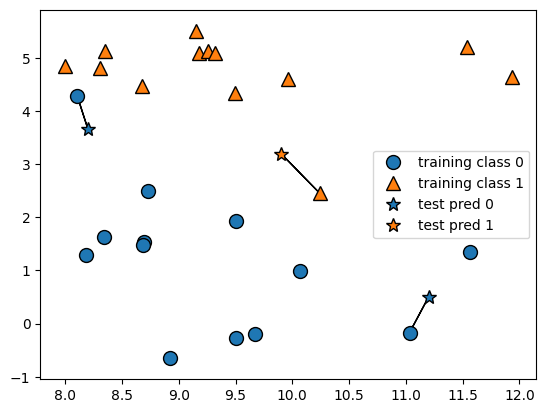

In [70]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

MULTIPLE NEIGHBORS

Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a label. This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent.

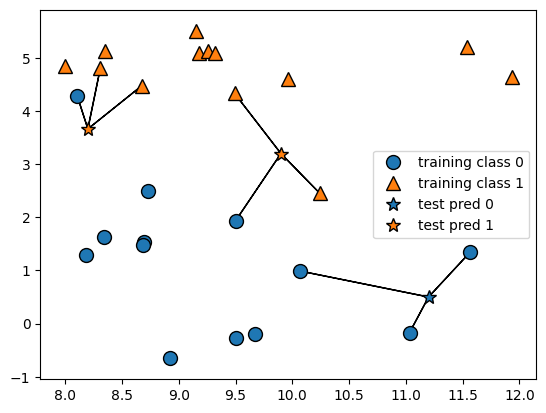

In [71]:
mglearn.plots.plot_knn_classification(n_neighbors=3)


In [72]:
from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

CONCLUSION: 1 NEIGHBOR VS. MULTIPLE NEIGHBORS

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity (as shown on the right side of Figure 2-1), and using many neighbors corresponds to low model complexity 

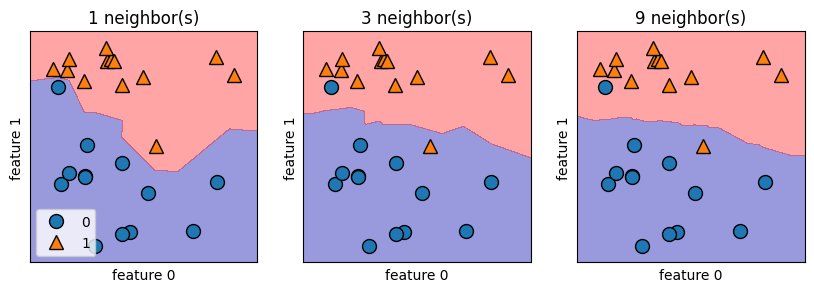

In [73]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

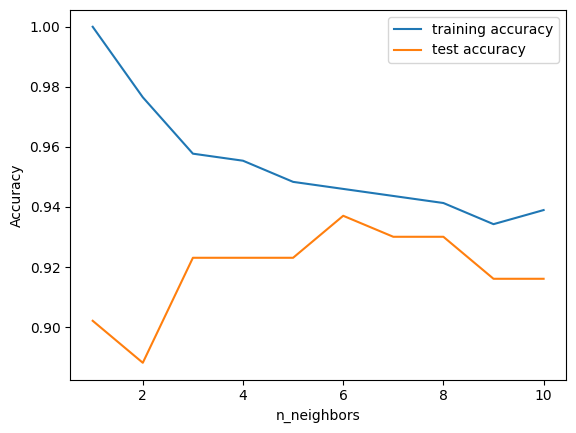

In [74]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neigh‐ bors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

2. LOGISTIC REGRESSION AND SUPPORT VECTOR MACHINES

Logistic regression is one of the two most common linear classification algorithms - together with Support Vector Machines. Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.


/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


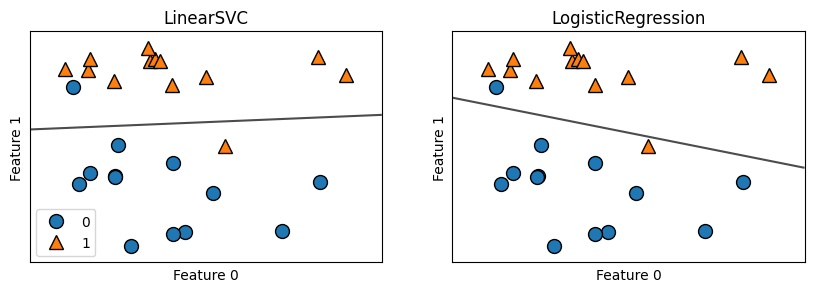

In [75]:

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__)) 
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1")
axes[0].legend()


SUPPORT VECTOR MACHINES VS. LOGISTIC REGRESSION

In this figure, we have the first feature of the forge dataset on the x-axis and the second feature on the y-axis, as before. We display the decision boundaries found by LinearSVC and LogisticRegression respectively as straight lines, separating the area classified as class 1 on the top from the area classified as class 0 on the bottom. In other words, any new data point that lies above the black line will be classified as class 1 by the respective classifier, while any point that lies below the black line will be classified as class 0. The two models come up with similar decision boundaries. Note that both misclassify two of the points. By default, both models apply an L2 regularization, in the same way that Ridge does for regression.

REGULARIZATION PARAMETER C

THE HIGHER THE C, THE MORE COMPLEX THE MODEL.

When you use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero. There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly. Here is an illustration using LinearSVC


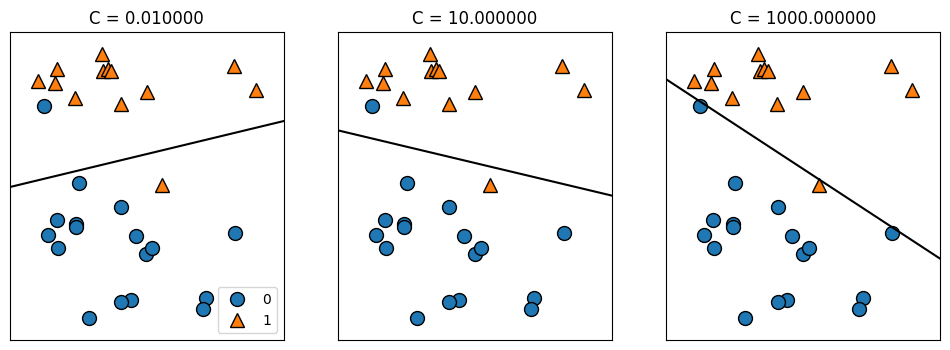

In [76]:
mglearn.plots.plot_linear_svc_regularization()

/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

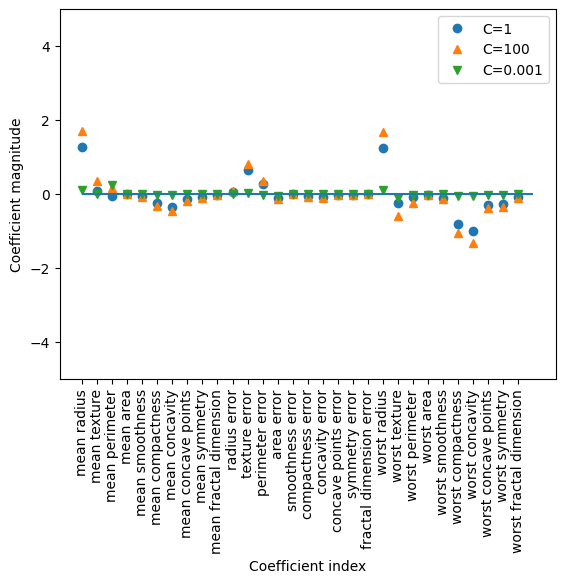

In [77]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
logreg = LogisticRegression().fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

3. LINEAR MODEL FOR MULTICLASS CLASSIFICATION = ONE-VS.-REST

A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.

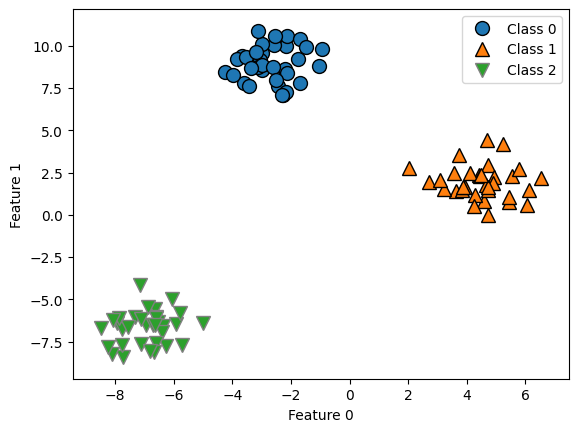

In [78]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

We train a LinearSVC classifier on the dataset. We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset). The intercept_ is now a one-dimensional array, storing the intercepts for each class.

All the points belonging to class 0 in the training data are above the line corresponding to class. The points in class 0 are above the line corresponding to class 2, which means they are classified as “rest” by the binary classifier for class 2. The points belonging to class 0 are to the left of the line corresponding to class 1, which means the binary classifier for class 1 also classifies them as “rest.” 

And what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer is the class of the closest line.


/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

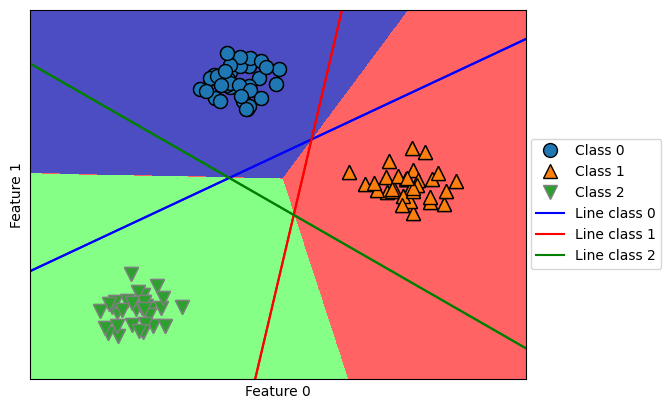

In [79]:
linear_svm = LinearSVC().fit(X, y)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                      ['b', 'r', 'g']):
        plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
        plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
                'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

4. NAIVE BAYES CLASSIFIERS
Naive Bayes classifiers are quite similar to the linear models but they are faster to train. But they are more difficult to generalise. There are 3 main types of these classifiers:

A. GaussianNB is used for any continuous data,  

B. BernoulliNB is used for binary data (counts how often every feature of each class is not zero), mostly used in text data classification.

C. MultinomialNB assumes count data (each feature represents an integer count of something, like how often a word appears in a sentence), again mostly used in text data classification. 

In [80]:
X = np.array([[0, 1, 0, 1],
                  [1, 0, 1, 1],
                  [0, 0, 0, 1],
                  [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
# iterate over each class
# count (sum) entries of 1 per feature 
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


ALPHA PARAMETER

MultinomialNB and BernoulliNB have a single parameter, alpha, which controls model complexity. The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. This results in a “smoothing” of the statistics.

THE HIGHER THE ALPHA, THE MORE COMPLEX THE MODEL. 

STRENGTHS 
1. very fast to train and to predict,  
2. the training procedure is easy to understand. 
3. work very well with high-dimensional sparse data 
4. are relatively robust to the parameters.  
5. Naive Bayes models are great baseline models and are often used on very large datasets, where training even a linear model might take too long.

2ND TYPE OF SUPERVISED LEARNING = REGRESSION

For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms (or real number in mathematical terms). Predicting a person’s annual income from their education, their age, and where they live is an example of a regression task. When predicting income, the predicted value is an amount, and can be any number in a given range. Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm. The yield again can be an arbitrary number.

1. STANDARD OLS LINEAR REGRESSION

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.

w[0]: 0.393906  b: -0.031804


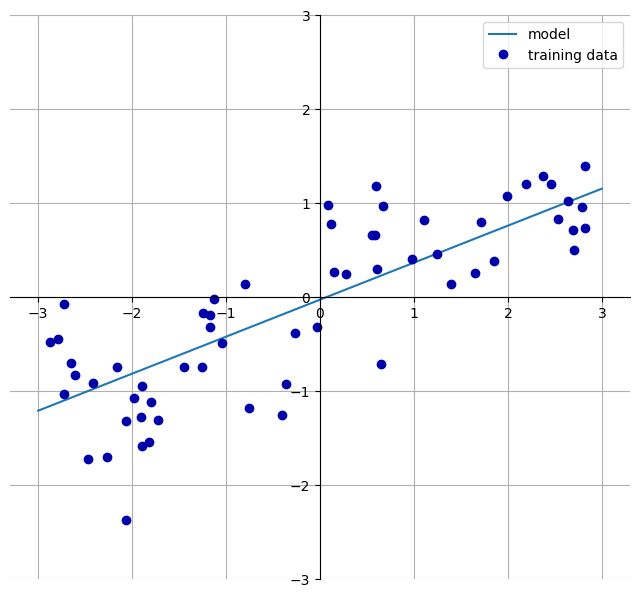

In [81]:
mglearn.plots.plot_linear_regression_wave()

In [82]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute

In [83]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [84]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


With higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. In line with this, when comparing training set and test set scores in our large Boston dataset, we find that we predict very accurately on the training set, but the R2 on the test set is much worse.

2. RIDGE REGRESSION

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called REGUARIZATION. Regularization means explicitly RESTRICTING a model TO AVOID OVERFITTING. The particular kind used by ridge regression is known as L2 regularization.

In [85]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.89
Test set score: 0.75


In [86]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


PARAMETER ALPHA

ALPHA HAS THE OPPOSITE MEANING THAN C. THE HIGHER THE ALPHA, THE SIMPLER THE MODEL. 

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. In the previous example, we used the default parameter alpha=1.0. There is no reason why this will give us the best trade-off, though. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization. 

DECREASING ALPHA MAKES THE COEFFICIENTS LESS RESTRICTED, UNTIL WE END UP WITH VALUES EQUIVALENT OF LINEAR REGRESSION

Training set score: 0.93
Test set score: 0.77


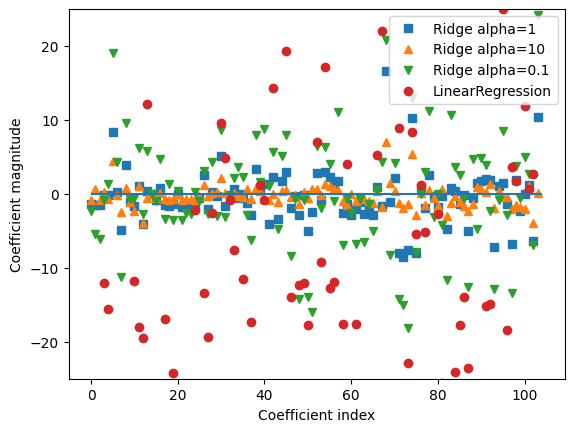

In [87]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

3. LASSO

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [88]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [89]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter. 
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.90
Test set score: 0.77
Number of features used: 33


ALPHA, AGAIN ...

A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using Ridge, and we are using only 33 of the 105 features. This makes this model potentially easier to understand.
If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to Linear Regression.

Text(0, 0.5, 'Coefficient magnitude')

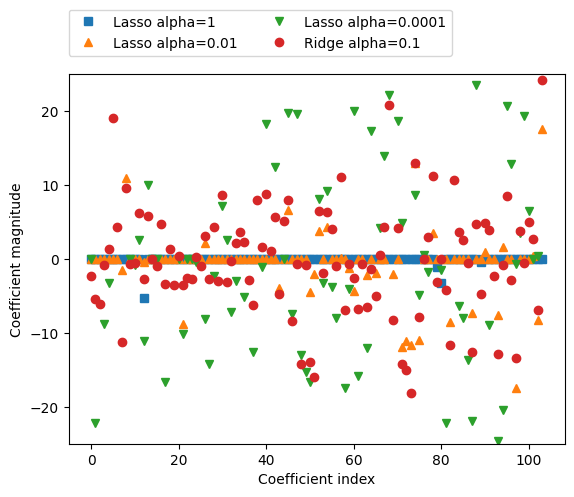

In [90]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

RIDGE VS. LASSO

Ridge regression is usually the first choice between these two models. 

However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. 

scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

LINEAR MODELS OVERVIEW

REGULARIZATION PARAMETER - large values for alpha or small values for C mean simple models

REGULARIZATION TYPE - If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

STRENGTHS
1. very fast to train, and also fast to predict, they scale to very large datasets and work well with sparse data
2. relatively easy to understand how a prediction is made

WEAKNESSES
1. it is often not entirely clear why coefficients are the way they are, particularly if the dataset has highly correlated features
2.  in lower-dimensional spaces, other models might yield better generalization performance. They only work well when the number of features is large compared to the number of samples.

MIXED CLASSIFICATION AND REGRESSION TECHNIQUES

1. DECISION TREES

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision.

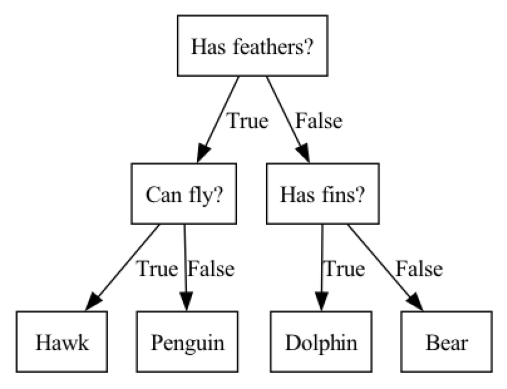

In [95]:
import sys
sys.path
#!conda install -c conda-forge graphviz python-graphviz -y
mglearn.plots.plot_animal_tree()

In machine learning parlance, we built a model to distinguish between four classes of animals (hawks, penguins, dolphins, and bears) using the three features “has feathers,” “can fly,” and “has fins.” Instead of building these models by hand, we can learn them from data using supervised learning.


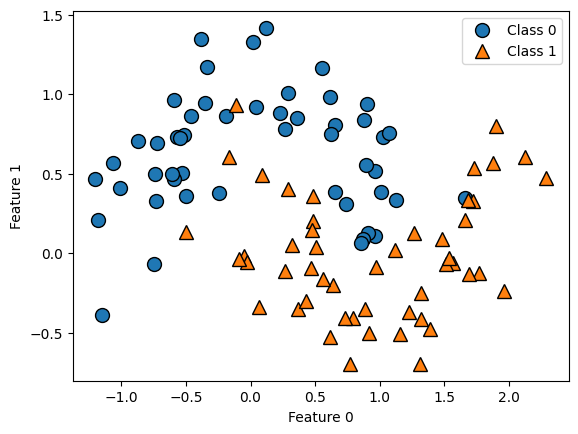

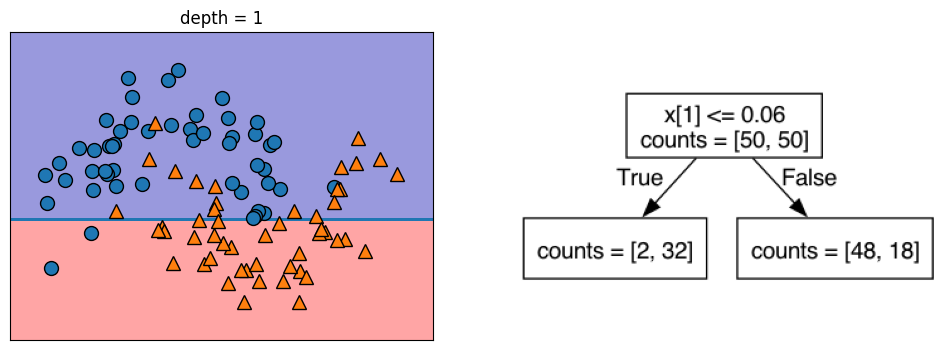

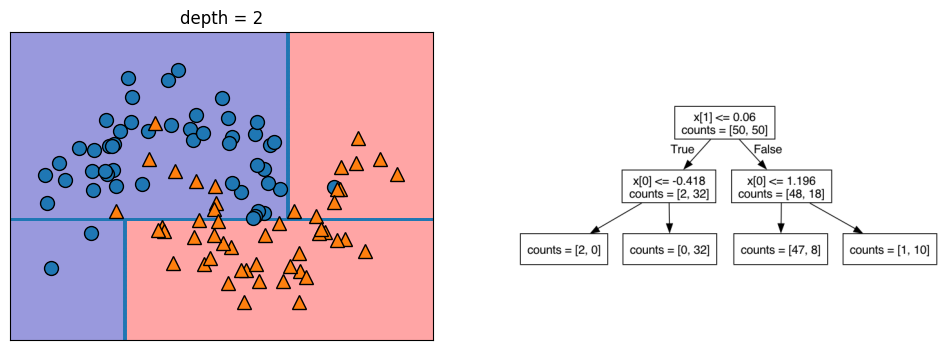

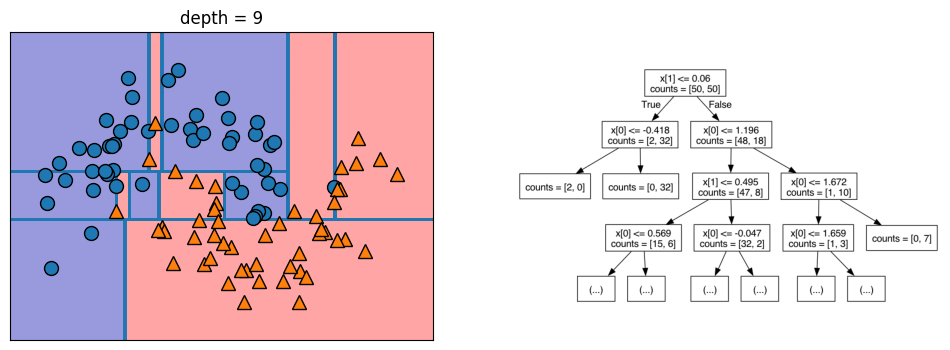

In [96]:
mglearn.plots.plot_tree_progressive()

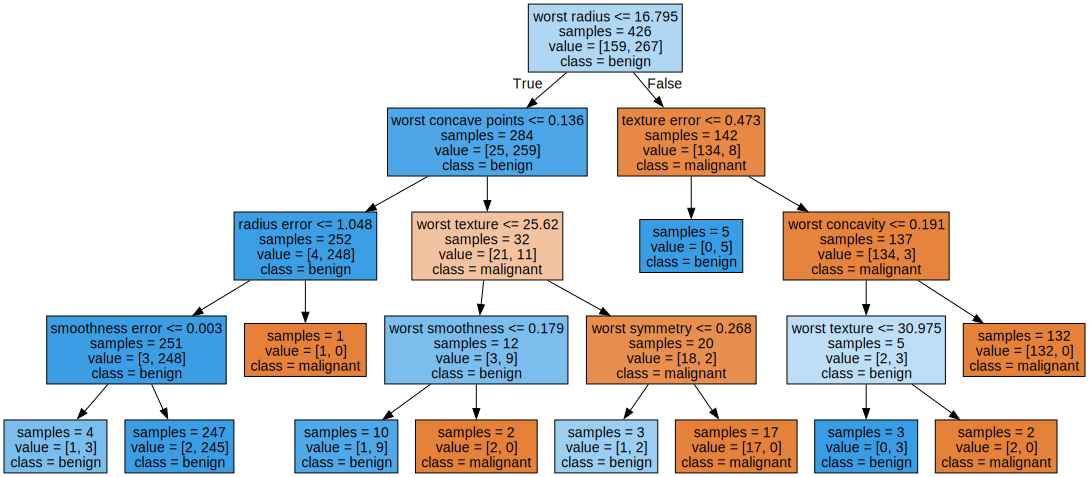

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)


tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f: dot_graph = f.read()
graphviz.Source(dot_graph)

TESTS

Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly. In the machine learning setting, these questions are called tests. To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable. The first test that is picked. Splitting the dataset vertically at x[1]=0.0596 yields the most information; it best separates the points in class 1 from the points in class 2. 

ROOT 

The top node, also called the root, represents the whole dataset, consisting of 75 points belonging to class 0 and 75 points belonging to class 1.

This recursive process yields a binary tree of decisions, with each node containing a test. Alternatively, you can think of each test as splitting the part of the data that is currently being considered along one axis. This yields a view of the algorithm as building a hierarchical partition. As each test concerns only a single feature, the regions in the resulting partition always have axis-parallel boundaries.

In [52]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937
Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [61]:

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
print("Feature importances:\n{}".format(tree.feature_importances_))
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), cancer.feature_names) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

TypeError: digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[1] <= -5.814\nsamples = 100\nvalue = [50, 50]", fillcolor="#ffffff"] ;
1 [label="samples = 25\nvalue = [25, 0]", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[1] <= 5.348\nsamples = 75\nvalue = [25, 50]", fillcolor="#9ccef2"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="samples = 50\nvalue = [0, 50]", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="samples = 25\nvalue = [25, 0]", fillcolor="#e58139"] ;
2 -> 4 ;
}
 is not an estimator instance.

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

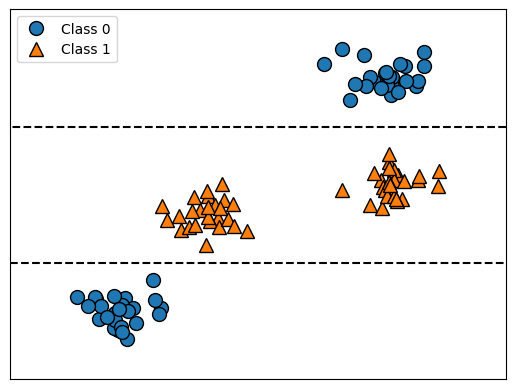

In [53]:

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)